In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(1)

/var/folders/2d/43gz16bj16192302z4mxx_8r0000gn/T/ipykernel_17820/2116776855.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# importing dataset
train_dataset = h5py.File('train_happy.h5', "r")
train_dataset

<HDF5 file "train_happy.h5" (mode r)>

In [3]:
# Load train dataset
train_dataset = h5py.File('train_happy.h5', "r")
X_train_org = np.array(train_dataset["train_set_x"][:]) # Features
y_train_org = np.array(train_dataset["train_set_y"][:]) # Labels


In [4]:
# Load test dataset
test_dataset = h5py.File('test_happy.h5', "r")
X_test_org = np.array(test_dataset["test_set_x"][:]) # Features
y_test_org = np.array(test_dataset["test_set_y"][:]) # Labels

In [5]:
# Close the dataset files
train_dataset.close()
test_dataset.close()

In [6]:
# Print the shapes of the data to make sure they're loaded correctly
print("X_train_org shape:", X_train_org.shape)
print("y_train_org shape:", y_train_org.shape)
print("X_test_org shape:", X_test_org.shape)
print("y_test_org shape:", y_test_org.shape)

X_train_org shape: (600, 64, 64, 3)
y_train_org shape: (600,)
X_test_org shape: (150, 64, 64, 3)
y_test_org shape: (150,)


In [7]:
# Normalize image vectors
X_train = X_train_org/255
X_test = X_test_org/255

In [8]:
# Reshape
y_train = y_train_org.T
y_test = y_test_org.T

In [9]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600,)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150,)


In [10]:
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(600, 64, 64, 3)


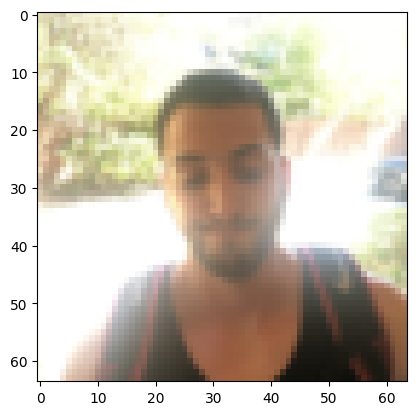

In [11]:
index = 124
plt.imshow(X_train[index]) #display sample training image
plt.show()

In [12]:
def happy_model():
  model = tf.keras.Sequential([
        tfl.ZeroPadding2D(padding = (3,3), input_shape = (64,64,3)),
        tfl.Conv2D(32, (7,7), strides = (1,1)),
        tfl.BatchNormalization(axis = 3),
        tfl.ReLU(),
        tfl.MaxPool2D(), # default pool_size (2,2)
        tfl.Flatten(),
        tfl.Dense(1, activation = "sigmoid")
    ])
  return model

In [13]:
happy_model = happy_model()
happy_model

In [14]:
happy_model.compile(optimizer = "adam",
                    loss = "binary_crossentropy",
                    metrics = ["accuracy"])

In [15]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 70, 70, 3)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                        

In [16]:
happy_model.fit(X_train, y_train, epochs = 10, batch_size = 16)

Epoch 1/10
38/38 [==============================] - 1s 18ms/step - loss: 2.0607 - accuracy: 0.6500
Epoch 2/10
38/38 [==============================] - 1s 16ms/step - loss: 0.2228 - accuracy: 0.9067
Epoch 3/10
38/38 [==============================] - 1s 17ms/step - loss: 0.2320 - accuracy: 0.9150
Epoch 4/10
38/38 [==============================] - 1s 17ms/step - loss: 0.1428 - accuracy: 0.9383
Epoch 5/10
38/38 [==============================] - 1s 17ms/step - loss: 0.0833 - accuracy: 0.9700
Epoch 6/10
38/38 [==============================] - 1s 17ms/step - loss: 0.0868 - accuracy: 0.9700
Epoch 7/10
38/38 [==============================] - 1s 18ms/step - loss: 0.1043 - accuracy: 0.9667
Epoch 8/10
38/38 [==============================] - 1s 18ms/step - loss: 0.0918 - accuracy: 0.9717
Epoch 9/10
38/38 [==============================] - 1s 17ms/step - loss: 0.0949 - accuracy: 0.9567
Epoch 10/10
38/38 [==============================] - 1s 16ms/step - loss: 0.0453 - accuracy: 0.9900


In [20]:
# Evaluate your model
loss, accuracy = happy_model.evaluate(X_test, y_test)
print("Test Accuracy: {} and Test Loss : {}".format(accuracy,loss))

5/5 [==============================] - 0s 9ms/step - loss: 0.1742 - accuracy: 0.9400
Test Accuracy: 0.9399999976158142 and Test Loss : 0.17418499290943146


In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

5/5 [==============================] - 0s 9ms/step


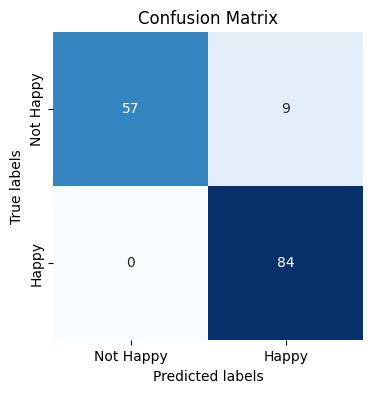

In [26]:
# Make predictions on test set
y_pred = happy_model.predict(X_test)
y_predicted_labels = np.round(y_pred).flatten()

# Convert float predictions to binary
predicted_labels = (y_predicted_labels > 0.5).astype(int)

# Create confusion matrix
cm = confusion_matrix(y_test, y_predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Happy', 'Happy'], yticklabels=['Not Happy', 'Happy'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()